In [1]:
from typing import List, Optional

import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as ss
import seaborn as sns
from sklearn import model_selection, linear_model, preprocessing, metrics
import sklearn

In [2]:
df = pd.read_csv('data/processed/extracted.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,Income,Kidhome,Teenhome,Customer_Years,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Accepted
0,58138.0,0,0,10,58,635,88,546,172,88,88,8,10,4,1
1,46344.0,1,1,9,38,11,1,6,2,1,6,1,1,2,0
2,71613.0,0,0,9,26,426,49,127,111,21,42,8,2,10,0
3,26646.0,1,0,9,26,11,4,20,10,3,5,2,0,4,0
4,58293.0,1,0,9,94,173,43,118,46,27,15,5,3,6,0


In [3]:
TRAIN_RATIO, N_SPLITS = 0.8, 3
X = df.drop(columns='Accepted')
y = df['Accepted']

In [4]:
X, y = X.to_numpy(), y.to_numpy()
test_ratio = 0.2

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_ratio, random_state=42,
                                                                    shuffle=True, stratify=y)

len(X_train), len(X_test)

(1764, 441)

In [6]:
clf = linear_model.LogisticRegression(solver='lbfgs', random_state=42)

clf = clf.fit(X_train, y_train)

train_preds = clf.predict(X_train)
test_probs = clf.predict_proba(X_test)
test_preds = clf.predict(X_test)

In [7]:
len(train_preds), len(test_preds)

(1764, 441)

In [8]:
def get_accuracy(preds: np.ndarray, y: np.ndarray):
  num_correct = np.equal(preds, y).mean()

  return num_correct

train_accuracy, test_accuracy = get_accuracy(train_preds, y_train), get_accuracy(test_preds, y_test)
train_accuracy, test_accuracy

(0.7811791383219955, 0.7709750566893424)

<AxesSubplot:>

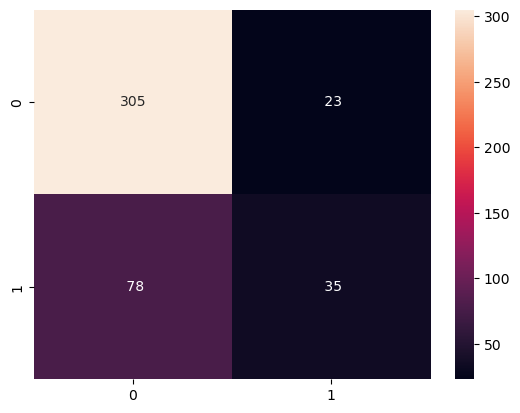

In [43]:
confusion_matrix = metrics.confusion_matrix(y_test, test_preds)
sns.heatmap(confusion_matrix, fmt='3d', annot=True)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.763


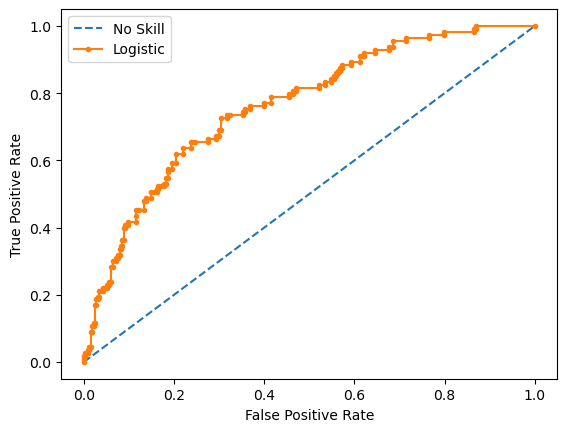

In [44]:
from sklearn.metrics import roc_auc_score, roc_curve

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# keep probabilities for the positive outcome only
test_probs = test_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, test_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, test_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()